Step 1/2:

Sets up needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns
enc = LabelEncoder()

Step 3/4:

Downloads the data and does preprocessing

In [2]:
df = pd.read_csv("Cambridge Crime Data 2009-2016.csv")
df

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 17:00 - 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 16:30 - 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,2016-07192,09/30/2016 06:52:00 PM,09/16/2016 18:52 - 09/30/2016 18:52,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [3]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 17:00 - 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 16:30 - 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,2016-07192,09/30/2016 06:52:00 PM,09/16/2016 18:52 - 09/30/2016 18:52,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [4]:
df1= df.copy()
df1 = df1.drop(['File Number', 'Date of Report','Crime Date Time'], axis=1)
df1

,Crime,Reporting Area,Neighborhood,Location
0,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...
56009,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


Was deciding whether to encode Reporting Area or Not

In [5]:
s=np.unique(df1['Reporting Area'])
s

array([ 101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,
        201.,  202.,  203.,  204.,  205.,  301.,  302.,  303.,  304.,
        305.,  401.,  402.,  403.,  404.,  405.,  406.,  407.,  408.,
        409.,  410.,  411.,  501.,  502.,  503.,  504.,  505.,  506.,
        507.,  508.,  509.,  510.,  601.,  602.,  603.,  604.,  605.,
        606.,  607.,  608.,  609.,  610.,  611.,  612.,  613.,  701.,
        702.,  703.,  704.,  705.,  706.,  707.,  708.,  801.,  802.,
        803.,  804.,  805.,  901.,  902.,  903.,  904.,  905.,  906.,
        907.,  908.,  909.,  910.,  911.,  912.,  913., 1001., 1002.,
       1003., 1004., 1005., 1006., 1007., 1008., 1009., 1010., 1011.,
       1012., 1013., 1014., 1015., 1016., 1017., 1101., 1102., 1103.,
       1104., 1105., 1106., 1107., 1108., 1109., 1110., 1111., 1112.,
       1113., 1201., 1202., 1203., 1204., 1301., 1302., 1303., 1304.])

In [6]:
df1.info

<bound method DataFrame.info of                         Crime  Reporting Area     Neighborhood  \
0              Simple Assault           504.0    Cambridgeport   
1              Simple Assault           610.0    Mid-Cambridge   
2          Aggravated Assault           708.0        Riverside   
3              Simple Assault           105.0   East Cambridge   
4                  Disorderly           708.0        Riverside   
...                       ...             ...              ...   
56009  Larceny from Residence           510.0    Cambridgeport   
56010             Hit and Run          1105.0  North Cambridge   
56011              Harassment           702.0        Riverside   
56012             Hit and Run          1002.0   West Cambridge   
56013          Simple Assault          1002.0   West Cambridge   

                                                Location  
0                400 Massachusetts Avenue, Cambridge, MA  
1                    200 HAMPSHIRE STREET, Cambridge, MA 

In [7]:
X= df1.copy()
Report=df1.iloc[:, 1]
X['Crime']= enc.fit_transform(X.Crime.values)
X['Neighborhood']= enc.fit_transform(X.Neighborhood.values)
X['Location']= enc.fit_transform(X.Location.values)
#X['Reporting Area']= enc.fit_transform(Report.values) Doesnt Change Much
X

,Crime,Reporting Area,Neighborhood,Location
0,43,504.0,2,2903
1,43,610.0,7,2538
2,2,708.0,10,4212
3,43,105.0,3,2213
4,9,708.0,10,2368
...,...,...,...,...
56009,28,510.0,2,572
56010,19,1105.0,8,2683
56011,18,702.0,10,1480
56012,19,1002.0,12,6092


Wanted to see how bad of a time I was going to have trying to find any sort of information, got a bunch of cubes instead

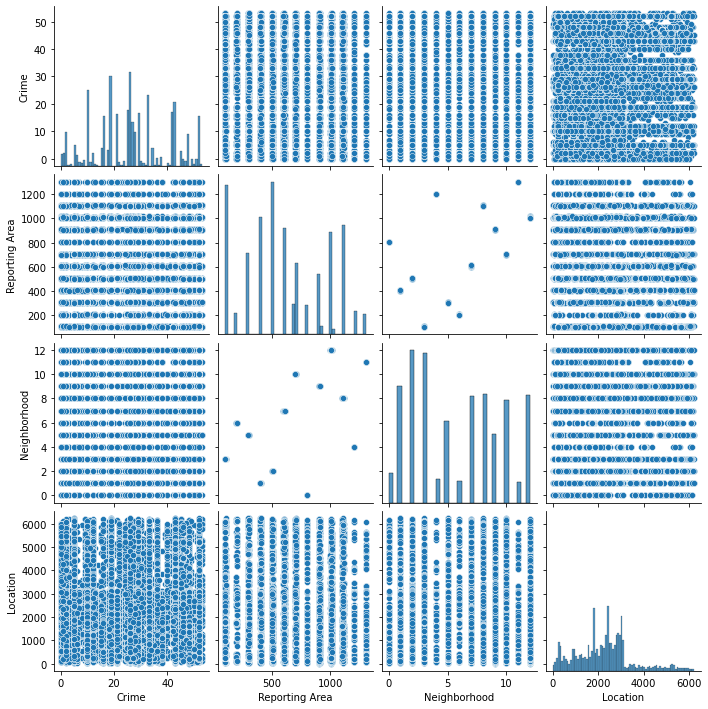

In [8]:
sns.pairplot(X)

In [9]:
X.corr()

,Crime,Reporting Area,Neighborhood,Location
Crime,1.000000,-0.058202,-0.034896,0.009550
Reporting Area,-0.058202,1.000000,0.661008,-0.093245
Neighborhood,-0.034896,0.661008,1.000000,-0.130059
Location,0.009550,-0.093245,-0.130059,1.000000


Using .corr I realized I was still in for a time but I selected 2 columns to use for my X despite low correlation(Neighborhood and Reporting Area by definition should be 1 or close by default anyways)

In [10]:
X1= X.drop(['Reporting Area', 'Location'], axis = 1)
X1

,Crime,Neighborhood
0,43,2
1,43,7
2,2,10
3,43,3
4,9,10
...,...,...
56009,28,2
56010,19,8
56011,18,10
56012,19,12


Step 5:

Makes an Elbow Plot to determine the best amount of clusters for kmeans

Text(0, 0.5, 'SSE')

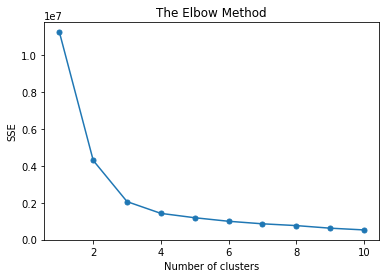

In [11]:
scores = []
for i in range(1, 11):
    kmodel = KMeans(n_clusters=i, random_state=0)
    kmodel.fit(X1)
    scores.append(kmodel.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

Step 6/7:

Trains the model and shows it using a scatter plot. The initial plot above does not work

In [12]:
X2 = X1.iloc[0:1000,:]

In [13]:
kmeans = KMeans(n_clusters=4, tol = 0.01,random_state = 0)
kmeans.fit(X2)
Ky = kmeans.predict(X2)

In [14]:
print(Ky)

[1 1 3 1 3 2 2 1 1 0 1 1 0 1 3 2 0 0 0 2 2 0 2 0 2 3 2 2 2 1 2 1 0 1 3 2 2
 2 2 2 2 3 2 2 2 1 2 1 2 0 1 1 3 2 3 2 3 2 1 3 2 2 3 2 2 2 3 3 2 2 1 1 3 0
 3 1 0 2 2 2 2 2 1 3 3 2 1 2 0 0 1 1 0 1 2 1 1 2 3 2 2 0 2 2 2 2 1 2 0 3 1
 0 2 0 0 1 0 3 1 0 0 0 0 1 2 3 1 0 3 2 0 0 1 0 2 0 2 2 2 2 2 2 2 0 1 1 2 0
 2 2 2 2 2 0 1 0 0 1 3 0 0 2 1 1 3 1 2 2 3 2 3 1 2 2 2 0 2 2 0 0 2 2 2 2 0
 0 0 1 3 2 0 2 2 2 0 0 1 2 2 2 1 1 0 1 3 0 0 3 2 2 2 1 3 2 0 1 0 3 2 1 0 2
 2 0 1 0 2 1 0 2 0 3 2 1 3 0 2 0 2 2 1 0 1 0 1 0 1 3 2 0 2 0 2 2 0 0 2 0 2
 2 1 2 1 2 0 3 2 3 1 0 2 2 2 3 3 0 0 1 2 3 2 1 1 1 2 0 0 1 2 1 0 0 2 0 0 2
 2 0 1 2 1 1 0 3 0 1 2 2 2 2 2 2 2 0 2 1 1 3 3 2 0 2 1 3 1 1 1 2 3 0 2 1 0
 2 0 3 2 0 1 0 3 3 2 1 1 2 1 0 1 0 3 0 0 2 0 1 0 1 2 1 0 2 2 0 2 1 0 2 0 2
 0 3 0 0 2 1 1 0 0 0 2 2 1 1 2 2 1 1 3 1 0 2 0 0 1 3 1 1 1 1 1 1 1 1 2 1 3
 0 2 2 2 3 2 0 0 0 1 2 2 3 0 1 3 1 3 1 0 2 2 2 1 2 2 2 2 2 2 1 3 2 2 0 3 2
 1 0 1 3 0 1 3 0 1 2 2 0 2 0 2 2 1 1 1 0 2 0 2 2 2 0 0 1 2 0 2 1 3 0 0 0 3
 2 0 2 3 1 1 1 2 2 2 1 0 

In [15]:
centres=kmeans.cluster_centers_
print(centres)

[[18.83935743  6.06827309]
 [45.14285714  5.42857143]
 [27.94647887  5.87042254]
 [ 6.74050633  5.46835443]]


DOES NOT WORK



import matplotlib.pyplot as plt
colors = ['orange', 'blue', 'green', 'cyan']
plt.figure(figsize=(15,7))
for i in range(4):
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

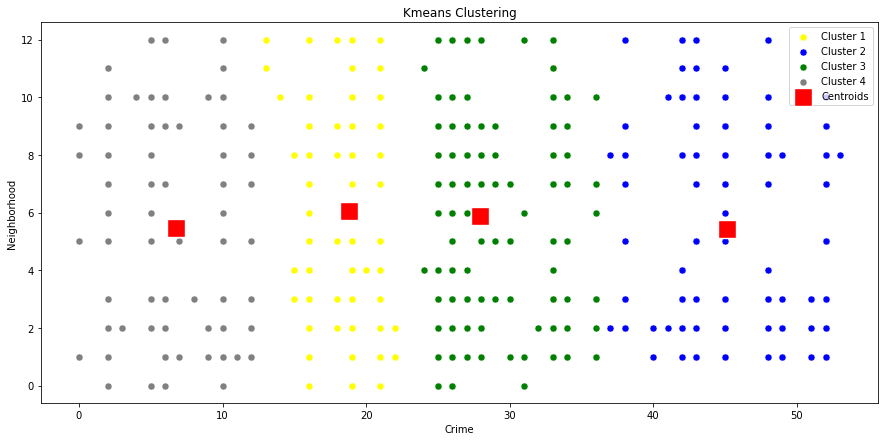

In [22]:
def KClus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(X2.iloc[Ky == 0, 0], X2.iloc[Ky == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(X2.iloc[Ky == 1, 0], X2.iloc[Ky == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(X2.iloc[Ky == 2, 0], X2.iloc[Ky == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(X2.iloc[Ky == 3, 0], X2.iloc[Ky == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
    #sns.scatterplot(df.iloc[y_kmeans == 4, 0], df.iloc[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=300,marker=',')
    plt.grid(False)
    plt.title('Kmeans Clustering')
    plt.legend()
    plt.show()
    return
KClus()

Step 8:

Makes a dendrogram and I really dont like how long these take so i limited the data

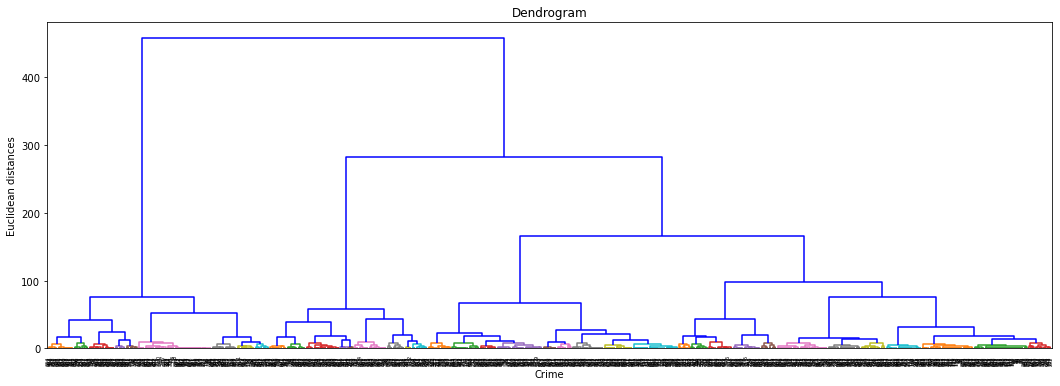

In [17]:
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Crime')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X2, method ='ward'),
                            color_threshold=10, 
                            above_threshold_color='blue') 


In [18]:
Agg = AgglomerativeClustering(n_clusters=4, linkage='average')
Agg.fit(X2)
Ay = kmeans.fit_predict(X2)

In [19]:
print(Ay)

[1 1 3 1 3 2 2 1 1 0 1 1 0 1 3 2 0 0 0 2 2 0 2 0 2 3 2 2 2 1 2 1 0 1 3 2 2
 2 2 2 2 3 2 2 2 1 2 1 2 0 1 1 3 2 3 2 3 2 1 3 2 2 3 2 2 2 3 3 2 2 1 1 3 0
 3 1 0 2 2 2 2 2 1 3 3 2 1 2 0 0 1 1 0 1 2 1 1 2 3 2 2 0 2 2 2 2 1 2 0 3 1
 0 2 0 0 1 0 3 1 0 0 0 0 1 2 3 1 0 3 2 0 0 1 0 2 0 2 2 2 2 2 2 2 0 1 1 2 0
 2 2 2 2 2 0 1 0 0 1 3 0 0 2 1 1 3 1 2 2 3 2 3 1 2 2 2 0 2 2 0 0 2 2 2 2 0
 0 0 1 3 2 0 2 2 2 0 0 1 2 2 2 1 1 0 1 3 0 0 3 2 2 2 1 3 2 0 1 0 3 2 1 0 2
 2 0 1 0 2 1 0 2 0 3 2 1 3 0 2 0 2 2 1 0 1 0 1 0 1 3 2 0 2 0 2 2 0 0 2 0 2
 2 1 2 1 2 0 3 2 3 1 0 2 2 2 3 3 0 0 1 2 3 2 1 1 1 2 0 0 1 2 1 0 0 2 0 0 2
 2 0 1 2 1 1 0 3 0 1 2 2 2 2 2 2 2 0 2 1 1 3 3 2 0 2 1 3 1 1 1 2 3 0 2 1 0
 2 0 3 2 0 1 0 3 3 2 1 1 2 1 0 1 0 3 0 0 2 0 1 0 1 2 1 0 2 2 0 2 1 0 2 0 2
 0 3 0 0 2 1 1 0 0 0 2 2 1 1 2 2 1 1 3 1 0 2 0 0 1 3 1 1 1 1 1 1 1 1 2 1 3
 0 2 2 2 3 2 0 0 0 1 2 2 3 0 1 3 1 3 1 0 2 2 2 1 2 2 2 2 2 2 1 3 2 2 0 3 2
 1 0 1 3 0 1 3 0 1 2 2 0 2 0 2 2 1 1 1 0 2 0 2 2 2 0 0 1 2 0 2 1 3 0 0 0 3
 2 0 2 3 1 1 1 2 2 2 1 0 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

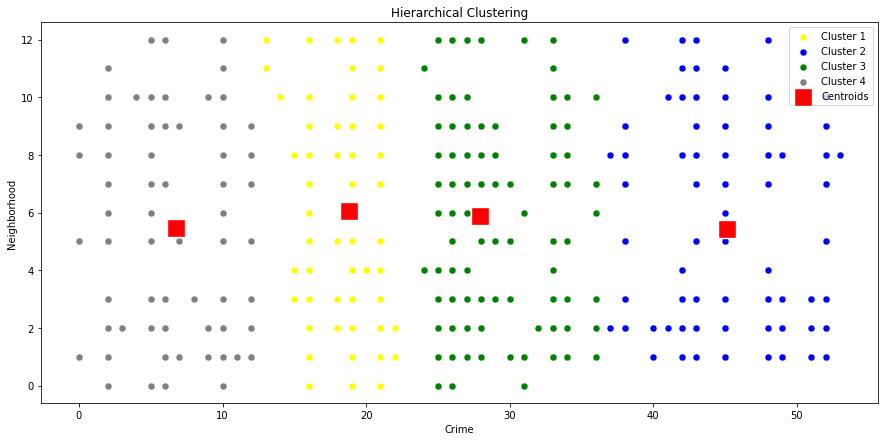

In [24]:
def HClus():
    import seaborn as sns
    plt.figure(figsize=(15,7))
    sns.scatterplot(X2.iloc[Ay == 0, 0], X2.iloc[Ay == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(X2.iloc[Ay == 1, 0], X2.iloc[Ay == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
    sns.scatterplot(X2.iloc[Ay == 2, 0], X2.iloc[Ay == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(X2.iloc[Ay == 3, 0], X2.iloc[Ay == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
    #sns.scatterplot(df.iloc[y_kmeans == 4, 0], df.iloc[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=300,marker=',')
    plt.grid(False)
    plt.title('Hierarchical Clustering')
    plt.legend()
    plt.show()
    return
HClus()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

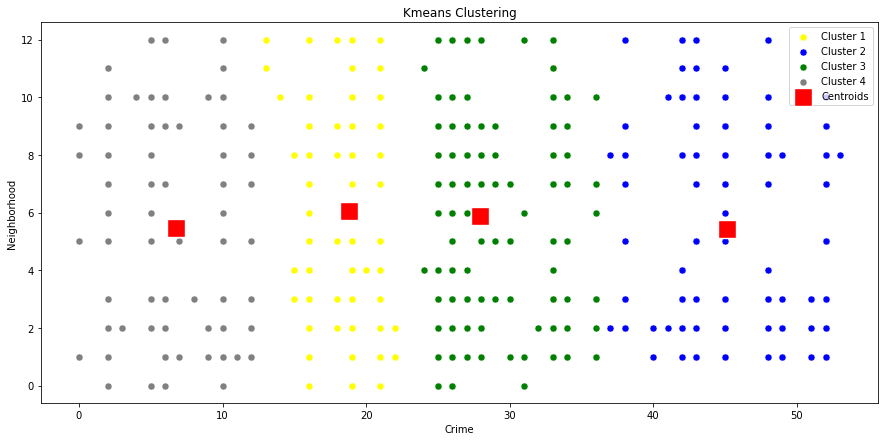

In [25]:
KClus()

Judging from the graphs it seems that based on a limited data set they provide extremely similar results. The only reason I would pick Kmeans is that it is less computationally demanding to find the best amount of clusters and runs faster with the whole dataset